In [113]:
import pandas as pd
df = pd.read_csv('../data/stron_lake.csv')
print(df)

   lake1  lake2  lake3  lake4  lake5
0   28.2   39.6   46.3   41.0   56.3
1   33.2   40.8   42.1   44.1   54.1
2   36.4   37.9   43.5   46.4   59.4
3   34.6   37.1   48.8   40.2   62.7
4   29.1   43.6   43.7   38.6   60.0
5   31.0   42.4   40.1   36.3   57.3


## 分散分析(実装）

In [98]:
mean_total = df.mean().mean()
sq_sum = ((df-df.mean().mean())**2).sum().sum()
sq_sum_w = ((df-df.mean())**2).sum().sum()
sq_sum_b = (((df.mean() - df.mean().mean())**2)*6).sum()

D_w = (6-1)*5
D_b = 5-1

V_w = sq_sum_w/D_w
V_b = sq_sum_b/D_b

f =  V_b/V_w

In [99]:
print('f = ',f)

f =  56.15455904640972


In [94]:
from scipy.stats import f

# 分子、分母の自由度
dfn, dfd = 4, 25

# 5%点の値(上側なので、95% を指定する)
five = f.ppf(0.95, dfn, dfd)
print('上側確率 5%:', five)

# 1%点の値(上側なので、99% を指定する)
one = f.ppf(0.99, dfn, dfd)
print('上側確率 1%:', one)

上側確率 5%: 2.758710469717632
上側確率 1%: 4.1774202346456395


## 分散分析（確認）

In [103]:
from scipy import stats as st
f, p = st.f_oneway(df['lake1'], df['lake2'],df['lake3'], df['lake4'], df['lake5'])
print('f = ',f)
print('p = ',p)

f =  56.15455904640978
p =  3.947885416487587e-12


## 多重検定
すべての2群の組み合せに対して平均値が等しいことをTukey-Kramerの手法で検定

Text(0,0.5,'strength')

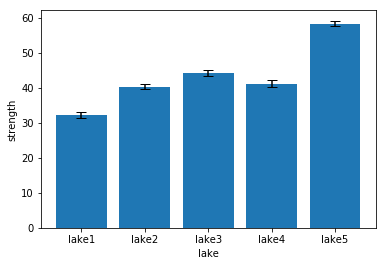

In [111]:
from matplotlib import pyplot as plt
import numpy as np
lake1 = df['lake1']
lake2 = df['lake2']
lake3 = df['lake3']
lake4 = df['lake4']
lake5 = df['lake5']
# 横軸
horizontal_axis = df.columns.values
# 縦軸
vertical_axis = np.array(np.mean(df))
# エラーバー
error_bar = np.array(np.std(df) / np.sqrt(12))
plt.bar(horizontal_axis, vertical_axis, yerr = error_bar, ecolor="black", capsize=5)
plt.xlabel("lake")
plt.ylabel("strength")

In [110]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
def tukey_hsd( ind, *args ):
    # 第1引数:名称のリスト（index）, 第2引数以降: データ (*args: 複数の引数をタプルとして受け取る)
    data_arr = np.hstack( args ) 
    ind_arr = np.array([])
    for x in range(len(args)):
        ind_arr = np.append(ind_arr, np.repeat(ind[x], len(args[x]))) 
    print(pairwise_tukeyhsd(data_arr,ind_arr))
    
tukey_hsd(df.columns , lake1, lake2, lake3, lake4, lake5)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
lake1  lake2    8.15    2.8511 13.4489  True 
lake1  lake3    12.0    6.7011 17.2989  True 
lake1  lake4   9.0167   3.7178 14.3156  True 
lake1  lake5  26.2167  20.9178 31.5156  True 
lake2  lake3    3.85   -1.4489  9.1489 False 
lake2  lake4   0.8667  -4.4322  6.1656 False 
lake2  lake5  18.0667  12.7678 23.3656  True 
lake3  lake4  -2.9833  -8.2822  2.3156 False 
lake3  lake5  14.2167   8.9178 19.5156  True 
lake4  lake5    17.2   11.9011 22.4989  True 
---------------------------------------------
